In [1]:
import os
import urllib.request

file_path="the-verdict.txt"
url="https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
  with urllib.request.urlopen(url) as response:
    text_data=response.read().decode('utf-8')
  with open(file_path,'w',encoding="utf-8") as f:
    f.write(text_data)
else:
  with open(file_path,"r",encoding="utf-8") as rf:
    text_data=rf.read()

raw_text=text_data

In [2]:
import re
text="Hello, world."
text=re.split(r"(\s)",text)
text

['Hello,', ' ', 'world.']

In [3]:
text="Hello, world."
text=re.split(r"([,.]|\s)",text)
text
#Empty strings are due to matched delimiter space and , coming together

['Hello', ',', '', ' ', 'world', '.', '']

In [4]:
result=[item for item in text if item.strip()]
result

['Hello', ',', 'world', '.']

In [5]:
text="Hello, world."
text = re.split(r'([,.:;$?/!"()\-_\']|--|\s)',text)
result=[i for i in text if i.strip()]
result

['Hello', ',', 'world', '.']

In [6]:
raw_text[:10]

'I HAD alwa'

In [7]:
preprocessed=re.split(r'([,.:;$?/!"()\_\']|--|\s)',raw_text)
result=[text for text in preprocessed if text.strip()]
result[:30]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius',
 '--',
 'though',
 'a',
 'good',
 'fellow',
 'enough',
 '--',
 'so',
 'it',
 'was',
 'no',
 'great',
 'surprise',
 'to',
 'me',
 'to',
 'hear',
 'that',
 ',',
 'in']

In [8]:
'''Next we have to assign token ids
each text in dataset is considered as vocabulary and is assigned unique token id
vocabulary has a list of all words in sorted order
'''



'Next we have to assign token ids\neach text in dataset is considered as vocabulary and is assigned unique token id\nvocabulary has a list of all words in sorted order\n'

In [9]:
result=sorted(set(result))
vocab={token:integer for integer,token in enumerate(result)}
vocab_size=len(vocab)
vocab_size

1130

In [10]:
class SimplifiedTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}
  def encode(self,text):
    preprocessed=re.split(r'([,.:;$?/!"()\_\']|--|\s)',text)
    preprocessed=[text.strip() for text in preprocessed if text.strip()]
    ids=[self.str_to_int[s] for s in preprocessed ]
    return ids

  def decode(self,ids):
    text=[self.int_to_str[id] for id in ids]
    text=" ".join(text)
    text=re.sub(r'(\s)+([,.()?/!\'\"])',r'\2',text)
    return text

In [11]:
tokenizer=SimplifiedTokenizerV1(vocab)
text="I always thought, he was a genius?"
ids=tokenizer.encode(text)
ids

[53, 149, 1003, 5, 533, 1077, 115, 486, 10]

In [12]:
tokenizer.decode(ids)

'I always thought, he was a genius?'

In [13]:
#special context tokens for handling unkown words and end of text
#end of text is to tell model that a text has ended so that model knows the data is segregated and colleceted from different sources



In [14]:
all_tokens=sorted((set(result)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])
vocab={token:integer for integer,token in enumerate(all_tokens)}
vocab_size=len(vocab)
vocab_size


1132

In [15]:
class SimplifiedTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}
  def encode(self,text):
    preprocessed=re.split(r'([,.:;$?/!"()\_\']|--|\s)',text)
    preprocessed=[text.strip() for text in preprocessed if text.strip()]
    preprocessed=[item if(item in self.str_to_int)
    else "<|unk|>" for item in preprocessed]
    ids=[self.str_to_int[s] for s in preprocessed ]
    return ids

  def decode(self,ids):
    text=[self.int_to_str[id] for id in ids]
    text=" ".join(text)
    text=re.sub(r'(\s)+([,.()?/!\'\"])',r'\2',text)
    return text

In [16]:
tokenizer=SimplifiedTokenizerV2(vocab)
text="I always thought, he was a gens?"
text2="In the sunlit"
joined=" <|endoftext|> ".join((text,text2))
ids=tokenizer.encode(joined)
ids

[53, 149, 1003, 5, 533, 1077, 115, 1131, 10, 1130, 55, 988, 956]

In [17]:
"""
[PAD] -Padding tokken to match batch size
[BOS] -begging of a sentence
[EOS] -end of a sentence
[UNK] -unknown token

"""

'\n[PAD] -Padding tokken to match batch size\n[BOS] -begging of a sentence\n[EOS] -end of a sentence\n[UNK] -unknown token\n\n'

In [18]:
tokenizer.decode(ids)

'I always thought, he was a <|unk|>? <|endoftext|> In the sunlit'

##BPE


In [19]:
!pip install tiktoken

In [20]:
import importlib
import tiktoken

tokenizer=tiktoken.get_encoding("gpt2")

In [21]:
text="Hello do you like tea? <|endoftext|> In the sunlit he was a genius of a someunkownplace. someunknown"
ids=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
ids

[15496,
 466,
 345,
 588,
 8887,
 30,
 220,
 50256,
 554,
 262,
 4252,
 18250,
 339,
 373,
 257,
 15632,
 286,
 257,
 617,
 2954,
 593,
 5372,
 13,
 617,
 34680]

In [22]:

tokenized_data=tokenizer.encode(raw_text)
total_len=len(tokenized_data)
tokenized_data

[40,
 367,
 2885,
 1464,
 1807,
 3619,
 402,
 271,
 10899,
 2138,
 257,
 7026,
 15632,
 438,
 2016,
 257,
 922,
 5891,
 1576,
 438,
 568,
 340,
 373,
 645,
 1049,
 5975,
 284,
 502,
 284,
 3285,
 326,
 11,
 287,
 262,
 6001,
 286,
 465,
 13476,
 11,
 339,
 550,
 5710,
 465,
 12036,
 11,
 6405,
 257,
 5527,
 27075,
 11,
 290,
 4920,
 2241,
 287,
 257,
 4489,
 64,
 319,
 262,
 34686,
 41976,
 13,
 357,
 10915,
 314,
 2138,
 1807,
 340,
 561,
 423,
 587,
 10598,
 393,
 28537,
 2014,
 198,
 198,
 1,
 464,
 6001,
 286,
 465,
 13476,
 1,
 438,
 5562,
 373,
 644,
 262,
 1466,
 1444,
 340,
 13,
 314,
 460,
 3285,
 9074,
 13,
 46606,
 536,
 5469,
 438,
 14363,
 938,
 4842,
 1650,
 353,
 438,
 2934,
 489,
 3255,
 465,
 48422,
 540,
 450,
 67,
 3299,
 13,
 366,
 5189,
 1781,
 340,
 338,
 1016,
 284,
 3758,
 262,
 1988,
 286,
 616,
 4286,
 705,
 1014,
 510,
 26,
 475,
 314,
 836,
 470,
 892,
 286,
 326,
 11,
 1770,
 13,
 8759,
 2763,
 438,
 1169,
 2994,
 284,
 943,
 17034,
 318,
 477,
 314,
 892,


In [23]:
context_size=4
x=[]
y=[]
stride=1
for i in range(0,total_len-context_size,stride):
  x.append(tokenized_data[i:i+context_size])
  y.append(tokenized_data[i+1:i+1+context_size])


In [24]:
x[0],y[0]

([40, 367, 2885, 1464], [367, 2885, 1464, 1807])

In [25]:
from torch.utils.data import DataLoader,Dataset
import torch

In [26]:
class GPTDataset(Dataset):
  def __init__(self,txt,encode,tokenizer,max_length,stride):
    self.input_data=[]
    self.output_data=[]
    token_ids=tokenizer.encode(txt,allowed_special={"<|endoftext|>"})
    for i in range(0,len(token_ids)-max_length,stride):
      self.input_data.append(torch.tensor(token_ids[i:i+max_length]))
      self.output_data.append(torch.tensor(token_ids[i+1:i+1+max_length]))

  def __len__(self):
    return len(self.input_data)
  def __getitem__(self,idx):
    return self.input_data[idx],self.output_data[idx]


In [27]:
def create_dataloader(txt,batch_size=2,max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0):
  tokenizer=tiktoken.get_encoding("gpt2")
  dataset=GPTDataset(txt,tokenizer.encode,tokenizer,max_length,stride)
  dataloader=DataLoader(dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last,num_workers=num_workers)
  return dataloader


In [28]:
dataloader = create_dataloader(
    raw_text, batch_size=5, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)


[tensor([[  40,  367, 2885, 1464],
        [ 367, 2885, 1464, 1807],
        [2885, 1464, 1807, 3619],
        [1464, 1807, 3619,  402],
        [1807, 3619,  402,  271]]), tensor([[  367,  2885,  1464,  1807],
        [ 2885,  1464,  1807,  3619],
        [ 1464,  1807,  3619,   402],
        [ 1807,  3619,   402,   271],
        [ 3619,   402,   271, 10899]])]


In [29]:
import torch.nn as nn
from torch import tensor


In [30]:
x=tensor([1])
y=tensor([2])
x@y

tensor(2)

In [31]:
vector=tensor(
    [[0.43,0.15,0.89],
   [0.55,0.87,0.66],
    [0.57,0.85,0.64],
     [0.22,0.58,0.33],
    [0.77,0.25,0.10],
    [0.05,0.80,0.55]]
  )

In [32]:
vector_embeddings={}
for i,v in enumerate(vector):
  vector_embeddings[i]=v
vector_embeddings

{0: tensor([0.4300, 0.1500, 0.8900]),
 1: tensor([0.5500, 0.8700, 0.6600]),
 2: tensor([0.5700, 0.8500, 0.6400]),
 3: tensor([0.2200, 0.5800, 0.3300]),
 4: tensor([0.7700, 0.2500, 0.1000]),
 5: tensor([0.0500, 0.8000, 0.5500])}

In [33]:
d_in=vector.shape[-1]
d_out=2

In [34]:
w_query=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_value=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

In [35]:
vector.shape,w_query.shape


(torch.Size([6, 3]), torch.Size([3, 2]))

In [36]:
querys=vector@w_query
keys=vector@W_key
values=vector@W_value

In [37]:
querys.shape

torch.Size([6, 2])

In [38]:
#atttention scores
attn_scores=querys@keys.T

In [39]:
attn_scores=attn_scores/keys.shape[-1]**0.5

In [40]:
attn_weights=torch.softmax(attn_scores,dim=-1)

In [41]:
attn_weights

tensor([[0.1680, 0.2481, 0.2458, 0.0992, 0.1222, 0.1167],
        [0.1688, 0.2609, 0.2593, 0.0869, 0.1234, 0.1007],
        [0.1688, 0.2604, 0.2588, 0.0873, 0.1234, 0.1013],
        [0.1722, 0.2140, 0.2135, 0.1216, 0.1488, 0.1299],
        [0.1701, 0.2247, 0.2232, 0.1161, 0.1359, 0.1301],
        [0.1730, 0.2225, 0.2222, 0.1134, 0.1475, 0.1214]])

In [42]:
context_vector=attn_weights@values

In [43]:
class selfAttentionV1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.d_in=d_in
    self.d_out=d_out
    self.W_query=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
    self.W_key=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
    self.W_value=nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

  def forward(self,X):
    queries=X@self.W_query
    keys=X@self.W_key
    values=X@self.W_value
    atten_scores=queries@keys.T
    atten_scrores=atten_scores/keys.shape[-1]**0.5
    atten_weights=torch.softmax(atten_scores,dim=-1)
    context_vector=atten_weights@values
    return context_vector

In [44]:
vector

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [45]:
selfat=selfAttentionV1(3,2)
selfat.forward(vector)

tensor([[1.1307, 1.3185],
        [1.1725, 1.3639],
        [1.1714, 1.3627],
        [1.1378, 1.3260],
        [1.1287, 1.3165],
        [1.1511, 1.3404]])

In [46]:
class selfAttentionV2(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.d_in=d_in
    self.d_out=d_out
    self.W_key=nn.Linear(d_in,d_out,bias=False)#use proper intitalization techniques not like random
    self.w_value=nn.Linear(d_in,d_out,bias=False)
    self.w_query=nn.Linear(d_in,d_out,bias=False)
  def forward(self,X):
    queries=self.w_query(X)
    keys=self.W_key(X)
    values=self.w_value(X)
    atten_scores=queries@keys.T
    atten_scrores=atten_scores/keys.shape[-1]**0.5
    atten_weights=torch.softmax(atten_scores,dim=-1)
    context_vector=atten_weights@values
    return context_vector

In [47]:
selfat=selfAttentionV1(3,2)
selfat.forward(vector)

tensor([[1.2681, 0.5015],
        [1.2691, 0.5104],
        [1.2681, 0.5099],
        [1.2249, 0.4875],
        [1.2249, 0.4864],
        [1.2382, 0.4950]])

CASUAL ATTENTION


In [48]:
attn_scores=querys@keys.T
context_length=6

In [49]:
mask=torch.triu(torch.ones(context_length,context_length),diagonal=1)
mask

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [50]:
attn_scores=attn_scores.masked_fill(mask.bool(),-torch.inf)
attn_scores

tensor([[2.1287,   -inf,   -inf,   -inf,   -inf,   -inf],
        [2.5468, 3.1628,   -inf,   -inf,   -inf,   -inf],
        [2.5309, 3.1443, 3.1351,   -inf,   -inf,   -inf],
        [1.3068, 1.6135, 1.6103, 0.8148,   -inf,   -inf],
        [1.5319, 1.9256, 1.9165, 0.9918, 1.2142,   -inf],
        [1.5586, 1.9147, 1.9125, 0.9614, 1.3336, 1.0574]])

In [51]:
attn_scores=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
attn_scores

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3928, 0.6072, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2453, 0.3786, 0.3761, 0.0000, 0.0000, 0.0000],
        [0.2388, 0.2966, 0.2960, 0.1686, 0.0000, 0.0000],
        [0.1955, 0.2583, 0.2566, 0.1334, 0.1562, 0.0000],
        [0.1730, 0.2225, 0.2222, 0.1134, 0.1475, 0.1214]])

In [52]:
x=nn.Linear(3,2,bias=False)
x.weight.shape

torch.Size([2, 3])

In [53]:
class CasualAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,bias=False):
    super().__init__()
    self.d_out=d_out
    self.d_in=d_in
    self.W_query=nn.Linear(d_in,d_out,bias=bias)
    self.W_key=nn.Linear(d_in,d_out,bias=bias)
    self.W_value=nn.Linear(d_in,d_out,bias=bias)
    self.dropout=nn.Dropout(dropout)
    self.register_buffer("mask",torch.tril(torch.ones(context_length,context_length),diagonal=1))

  def forward(self,X):
    batches,num_tokens,d_in=X.shape
    keys=self.W_key(X)
    query=self.W_query(X)
    value=self.W_value(X)
    atten_scores=query@keys.transpose(1,2)
    atten_scores.masked_fill(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
    atten_weights=torch.softmax(atten_scores/keys.shape[-1]**0.5,dim=-1)
    atten_weights=self.dropout(atten_weights)
    context_vector=atten_weights@value
    return context_vector





In [54]:
batch_input=torch.stack([vector,vector])
batch_input

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [55]:
casatt=CasualAttention(3,2,6,0.2)
casatt.forward(batch_input)

tensor([[[ 0.3617,  0.0130],
         [ 0.3625,  0.0148],
         [ 0.2481,  0.0182],
         [ 0.3628,  0.0146],
         [ 0.2894,  0.0154],
         [ 0.2629, -0.0428]],

        [[ 0.1984,  0.0597],
         [ 0.3625,  0.0148],
         [ 0.3627,  0.0149],
         [ 0.2853,  0.0135],
         [ 0.3269,  0.0240],
         [ 0.1151,  0.0142]]], grad_fn=<UnsafeViewBackward0>)

#MULI HEAD ATT


In [56]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,bias):
    super().__init__()
    self.heads=nn.ModuleList(
        CasualAttention(d_in,d_out,context_length,dropout,bias) for _ in range(num_heads)
    )
  def forward(self,X):
    return torch.cat([head(X) for head in self.heads],dim=-1)

In [57]:
batch_input

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [58]:
mah=MultiHeadAttention(3,2,6,0.2,2,False)
mah.forward(batch_input)

tensor([[[ 0.4557, -0.2041,  0.5008, -0.4602],
         [ 0.3332, -0.1672,  0.3686, -0.3610],
         [ 0.3564, -0.1933,  0.4216, -0.4182],
         [ 0.4511, -0.2036,  0.5699, -0.4965],
         [ 0.4509, -0.1202,  0.3701, -0.3591],
         [ 0.4516, -0.2033,  0.4971, -0.4551]],

        [[ 0.4010, -0.1005,  0.4409, -0.3983],
         [ 0.3869, -0.1934,  0.4952, -0.4590],
         [ 0.2385, -0.1557,  0.5038, -0.3635],
         [ 0.3950, -0.1827,  0.4974, -0.4616],
         [ 0.4505, -0.2047,  0.5696, -0.4976],
         [ 0.3374, -0.0821,  0.3675, -0.3604]]], grad_fn=<CatBackward0>)

In [59]:
mah=MultiHeadAttention(3,2,6,0.2,2,False)
mah.forward(batch_input)

tensor([[[-0.0339,  0.1292,  0.2884, -0.2583],
         [-0.0437,  0.0980,  0.2541, -0.1264],
         [-0.0883,  0.0593,  0.3076, -0.2193],
         [-0.0485,  0.0281,  0.3069, -0.2182],
         [-0.0243,  0.0654,  0.3059, -0.2191],
         [-0.0342,  0.0918,  0.2730, -0.1701]],

        [[-0.0558,  0.1043,  0.3048, -0.2173],
         [ 0.0770,  0.0251,  0.2541, -0.1264],
         [-0.1398,  0.1057,  0.2054, -0.1114],
         [-0.0029,  0.0680,  0.2909, -0.2582],
         [-0.0109,  0.0733,  0.2519, -0.1255],
         [-0.0185,  0.0316,  0.2916, -0.2577]]], grad_fn=<CatBackward0>)

In [60]:
torch.cat([torch.tensor([[1,2,3],[5,4,6]]),torch.tensor([[1,25,56],[69,50,40]])],dim=0)

tensor([[ 1,  2,  3],
        [ 5,  4,  6],
        [ 1, 25, 56],
        [69, 50, 40]])

In [61]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,bias):
    super().__init__()
    self.d_out=d_out
    assert(self.d_out%num_heads==0)
    self.num_heads=num_heads


    self.d_head=self.d_out//num_heads
    self.w_query=nn.Linear(d_in,d_out,bias=bias)
    self.w_key=nn.Linear(d_in,d_out,bias=bias)
    self.w_value=nn.Linear(d_in,d_out,bias=bias)
    self.dropout=nn.Dropout(dropout)
    self.register_buffer("mask",torch.tril(torch.ones(context_length,context_length),diagonal=1))

  def forward(self,X):
    batches,num_tokens,d_in=X.shape
    queries=self.w_query(X)
    keys=self.w_key(X)
    values=self.w_value(X)
    # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
    queries = queries.view(batches, num_tokens, self.num_heads, self.d_head)
    keys = keys.view(batches, num_tokens, self.num_heads, self.d_head)
    values = values.view(batches, num_tokens, self.num_heads, self.d_head)
    #  (b, num_tokens, num_heads, head_dim)->  (b, num_heads, num_tokens, head_dim)
    queries=queries.transpose(1,2)
    keys=keys.transpose(1,2)
    values=values.transpose(1,2)
    atten_scores=queries@keys.transpose(2,3)

    atten_scores.masked_fill(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
    atten_weights=torch.softmax(atten_scores/keys.shape[-1]**0.5,dim=-1)

    atten_weights=self.dropout(atten_weights)
    context_vector=atten_weights@values
    context_vector=context_vector.transpose(1,2).contiguous().view(batches,num_tokens,self.d_out)
    return context_vector

#contigous-brings all tensors to same memory block


#GPT_2


In [62]:
GPT_CONFIG_124M={
    "vocab_size":50257,
    "n_layer":12,
    "n_head":12,
    "emb_dim":768,
    "drop_rate":0.1,
    "context_length":258,#orginal is 1024
    "qkv_bias":False
}

In [63]:
import torch
from torch import nn


In [64]:
class LayerNorm(nn.Module):
  def __init__(self,emd_dim):
    super().__init__()
    self.eps=16-5
    self.scale=nn.Parameter(torch.ones(emd_dim))
    self.shift=nn.Parameter(torch.zeros(emd_dim))
  def forward(self,X):
    mean=X.mean(dim=-1,keepdim=True)
    var=X.var(dim=-1,keepdim=True,unbiased=False)#unbaised as false avoid bessel correction and is divided by n not
    norm_x=(X-mean)/torch.sqrt(var+self.eps)
    return self.scale*norm_x+self.shift

In [65]:
#example
batch_example=torch.randn(2,5)
layer=nn.Sequential(nn.Linear(5,5),nn.ReLU())
LayerNor=LayerNorm(5)
LayerNor.forward(layer(batch_example))

tensor([[ 0.1740, -0.0804, -0.0414,  0.0281, -0.0804],
        [-0.1409,  0.3822,  0.0407, -0.1409, -0.1409]], grad_fn=<AddBackward0>)

In [66]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()
  def forward(self,X):
    return 0.5*X*(1+torch.tanh(
        torch.sqrt(torch.tensor(2.0/torch.pi))*(X+0.044715*torch.pow(X,3))
        ))

In [67]:
class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    #expansion and contraction helps in laerning more from data
    self.layers=nn.Sequential(
        nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),#Expamisom
        GELU(),
        nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"]),#contraction

    )
  def forward(self,X):
    return self.layers(X)


In [68]:
class TransformerBlock(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.att=MultiHeadAttention(
        d_in=cfg["emb_dim"],
        d_out=cfg["emb_dim"],
        context_length=cfg["context_length"],
        dropout=cfg["drop_rate"],
        num_heads=cfg["n_head"],
        bias=cfg["qkv_bias"]
    )
    self.ff=FeedForward(cfg)
    self.norm1=LayerNorm(cfg["emb_dim"])
    self.norm2=LayerNorm(cfg["emb_dim"])
    self.drop_shortcut=nn.Dropout(cfg["drop_rate"])
  def forward(self,X):
    shortcut=X
    X=self.norm1(X)
    X=self.att(X)
    X=self.drop_shortcut(X)
    X=X+shortcut
    shortcut=X
    X=self.norm2(X)
    X=self.ff(X)
    X=self.drop_shortcut(X)
    X=X+shortcut

    return X



In [69]:
transformer=TransformerBlock(GPT_CONFIG_124M)
X=torch.randn(2,4,768)
transformer.forward(X)

tensor([[[ 0.8517,  1.2771,  0.5991,  ...,  0.6316,  0.1851, -0.7436],
         [-0.2482,  0.3575, -1.9244,  ...,  1.1176,  1.5551, -0.4224],
         [ 0.8012, -0.4539,  0.7029,  ..., -0.9050, -1.1018, -2.4742],
         [ 0.1222, -0.3102,  1.2451,  ..., -1.5321,  1.5540, -0.4453]],

        [[ 0.9676, -0.2311,  0.6034,  ...,  0.6068, -0.0134, -0.8894],
         [-0.9767,  0.3990,  2.2380,  ...,  0.0290, -0.0741, -1.1922],
         [ 0.4782, -0.2527, -1.4794,  ..., -0.4689,  0.7113,  0.0239],
         [ 0.5409,  1.3880, -1.6599,  ..., -0.7938, -1.7315,  0.8465]]],
       grad_fn=<AddBackward0>)

In [70]:
class GPTModel(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.token_emb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_emb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])

    self.tblocks=nn.Sequential(
        *[TransformerBlock(cfg) for _ in range(cfg["n_layer"])]
    )
    self.norm=LayerNorm(cfg["emb_dim"])
    self.out_head=nn.Linear(
        cfg["emb_dim"],
        cfg["vocab_size"],
        bias=False
    )
    self.drop_emb=nn.Dropout(cfg["drop_rate"])

  def forward(self,in_idx):
    batch_size,context_length=in_idx.shape
    token_emb=self.token_emb(in_idx)
    pos_emb=self.pos_emb(torch.arange(context_length,device=in_idx.device))
    X=token_emb+pos_emb
    X=self.drop_emb(X)
    X=self.tblocks(X)
    X=self.norm(X)
    logits=self.out_head(X)
    return logits


In [71]:
batch_input=torch.randint(1000,5000,(2,4))

model=GPTModel(GPT_CONFIG_124M)
model.forward(batch_input).shape

torch.Size([2, 4, 50257])

In [72]:
batch_input.shape

torch.Size([2, 4])

In [73]:
total_params=sum(p.numel() for p in model.parameters())
total_params

155334144

In [74]:
total_params-sum(p.numel() for p in model.out_head.parameters())

116736768

In [75]:
def generate_text_simple(model,idx,max_new_tokens,context_size):
  for _ in range (max_new_tokens):
    idx_cond=idx[:,-context_size:]
    logits=model(idx_cond)
    logits=logits[:,-1,:]
    probs=torch.softmax(logits,dim=-1)
    idx_next=torch.argmax(probs,dim=-1,keepdims=True)
    idx=torch.concat([idx,idx_next],dim=-1)
  return idx

In [76]:
input1="hello how are"
target1="how are you"
input2="did uou know"
target2="you know that"
input=torch.tensor(tokenizer.encode(input1)).unsqueeze(0)
target=torch.tensor(tokenizer.encode(target1)).unsqueeze(0)
input2=torch.tensor(tokenizer.encode(input2)).unsqueeze(0)
target2=torch.tensor(tokenizer.encode(target2)).unsqueeze(0)
pred=generate_text_simple(model,input,3,4)
tokenizer.decode(pred[0].tolist())


'hello how areagnar revolutionaries +='

In [77]:
input=torch.tensor([[16833,3626,6100],
                      [40,1107,588]])
target=torch.tensor([[3626,6100,345],
                    [1107,588,11311]])
input.shape

torch.Size([2, 3])

In [78]:
model=GPTModel(GPT_CONFIG_124M)

In [79]:
logits=model.forward(input)
logits.shape

torch.Size([2, 3, 50257])

In [80]:
logits=torch.softmax(logits,dim=-1)
logits

tensor([[[1.7509e-05, 2.0656e-05, 1.4978e-05,  ..., 2.4582e-05,
          1.3785e-05, 3.2439e-05],
         [1.6156e-05, 1.8522e-05, 2.1794e-05,  ..., 3.0743e-05,
          2.8834e-05, 2.3746e-05],
         [1.5961e-05, 9.1822e-06, 1.2456e-05,  ..., 1.8006e-05,
          2.0569e-05, 2.4180e-05]],

        [[1.9381e-05, 2.1054e-05, 1.6801e-05,  ..., 2.2823e-05,
          1.7227e-05, 1.7701e-05],
         [1.8539e-05, 1.8340e-05, 2.9077e-05,  ..., 2.7240e-05,
          2.2755e-05, 1.7774e-05],
         [1.7788e-05, 1.2387e-05, 2.4298e-05,  ..., 2.4481e-05,
          1.5539e-05, 2.0659e-05]]], grad_fn=<SoftmaxBackward0>)

In [81]:
target[0]

tensor([3626, 6100,  345])

In [82]:
target_prob1=logits[0,[0,1,2],target[0]]

target_prob2=logits[1,[0,1,2],target[1]]
target_prob1

tensor([2.9933e-05, 3.0146e-05, 1.3860e-05], grad_fn=<IndexBackward0>)

In [83]:
log_probs=torch.log(torch.cat((target_prob1,target_prob2)))
avg_log_probs=torch.mean(log_probs)
cross_entopy_loss=-avg_log_probs
cross_entopy_loss

tensor(10.8841, grad_fn=<NegBackward0>)

In [84]:
logits.shape,target.shape


(torch.Size([2, 3, 50257]), torch.Size([2, 3]))

using torch module


In [85]:
logits_flatten=logits.flatten(0,1)
target_flatten=target.flatten()

In [86]:
logits_flatten.shape,target_flatten.shape


(torch.Size([6, 50257]), torch.Size([6]))

In [87]:
cross_loss=torch.nn.functional.cross_entropy(logits_flatten,target_flatten)
cross_loss

tensor(10.8249, grad_fn=<NllLossBackward0>)

In [88]:
def calc_loss_batch(input_batch,target_batch,model,device):
  input_batch=input_batch.to(device)
  target_batch=target_batch.to(device)
  logits=model(input_batch)
  loss=torch.nn.functional.cross_entropy(logits.flatten(0,1),target_batch.flatten())
  return loss

In [89]:
import os
import urllib.request

file_path="the-verdict.txt"
url="https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
  with urllib.request.urlopen(url) as response:
    text_data=response.read().decode('utf-8')
  with open(file_path,'w',encoding="utf-8") as f:
    f.write(text_data)
else:
  with open(file_path,"r",encoding="utf-8") as rf:
    text_data=rf.read()


In [90]:
len(text_data)

20479

In [91]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")

In [92]:
train_ratio=0.90
split_idx=int(train_ratio*len(text_data))
train_data=text_data[:split_idx]
val_data=text_data[split_idx:]

In [93]:
train_loader=create_dataloader(
    train_data,batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    shuffle=True,
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    num_workers=0
)
val_loader=create_dataloader(
    val_data,batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    shuffle=True,
    drop_last=True,
    num_workers=0
)



In [94]:
data_iter = iter(val_loader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  518,     6, 14707,   588,   257,  2156,   286,  4116,    13,   679,
          1422,   470, 10505,   263,    11,   345,  1833,    11,  3595,   520,
          5493,   438,   258,   655,  3830,   612, 12703,  4964,    11,   290,
           319,   465, 11914,    11,   832,   262, 12768, 21213,    11,   314,
          3947,   284,  3285,   262,  1808,    25,   705,  8491,   345,  1654,
           345,   760,   810,   345,   821,  2406,   503,  8348,   198,   198,
             1,  1532,   314,   714,   423, 13055,   326,  1986,    11,   351,
           326,  1808,   319,   340,    11,   314,   815,   423,  1760,   257,
          1049,  1517,    13,   383,  1306,  6000,  1517,   373,   284,   766,
           326,   314,  3521,   470,   438,   392,   326, 11542,   373,  1813,
           502,    13,   887,    11, 11752,    11,   379,   326,  5664,    11,
          8759,  2763,    11,   373,   612,  1997,   319,  4534,   314,  3636,
           470,   423,  1813,   284,   423,   520, 

In [95]:
for x,y in train_loader:
  print(x.shape,y.shape)

torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])
torch.Size([2, 258]) torch.Size([2, 258])


In [96]:
def calc_loss_loader(data_loader,model,device,num_batches=None):
  total_loss=0
  if len(data_loader)==0:
    return float("nan")
  elif(num_batches is None):
    num_batches=len(data_loader)
  else:
    num_batches=min(num_batches,len(data_loader))
  for i,(x,y) in enumerate(data_loader):
    if i<num_batches:
      loss=calc_loss_batch(x,y,model,device)
      total_loss+=loss.item()
    else:
      break
    return total_loss/num_batches


In [97]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(258, 768)
  (tblocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (w_query): Linear(in_features=768, out_features=768, bias=False)
        (w_key): Linear(in_features=768, out_features=768, bias=False)
        (w_value): Linear(in_features=768, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (w_query): Linear(in_features=768, out_features=768, bias=False)
        (w_key): Linear(in_features=768, out_features=768, bias=False)
        (w_

In [98]:
torch.manual_seed(123)

with torch.no_grad():
  train_loss=calc_loss_loader(train_loader,model,device)
  val_loss=calc_loss_loader(val_loader,model,device)
print("Training loss:",train_loss)
print("Validation loss:",val_loss)

Training loss: 1.3563482761383057
Validation loss: 10.843839645385742


In [99]:
def text_to_token_ids(start_context,tokenizer):
  return torch.tensor(tokenizer.encode(start_context)).unsqueeze(0)
def token_ids_to_text(token_ids,tokenizer):
  return tokenizer.decode(token_ids.tolist()[0])

In [100]:
def generate_text_and_print(model,tokenizer,device,start_context):
  model.eval()
  context_size=model.pos_emb.weight.shape[0]
  encode=text_to_token_ids(start_context,tokenizer).to(device)
  with torch.no_grad():
    token_ids=generate_text_simple(model,encode,context_size=context_size,max_new_tokens=50)
  decoded_text=token_ids_to_text(token_ids,tokenizer)
  print(decoded_text.replace("\n",""))
  model.train()

In [101]:
def evaluate_model(model,train_loader,val_loader,device,eval_iter):
  model.eval()
  with torch.no_grad():
    train_loss=calc_loss_loader(train_loader,model,device,eval_iter)
    val_loss=calc_loss_loader(val_loader,model,device,eval_iter)
  model.train()
  return train_loss,val_loss

In [102]:
def train_model(model,train_loader,val_loader,optimizer,device,num_epochs,eval_freq,eval_iter,start_context,tokenizer):
  train_losses=[]
  val_losses=[]
  track_tokens_seen=[]
  tokens_seen=0
  global_step=-1
  for epoch in range(num_epochs):

    model.train()
    for input_batch,target_batch in train_loader:

      optimizer.zero_grad()
      loss=calc_loss_batch(input_batch,target_batch,model,device)
      loss.backward()
      optimizer.step()
      tokens_seen+=input_batch.numel()
      global_step+=1
      if global_step % eval_freq==0:
        train_loss,val_loss=evaluate_model(model,train_loader,val_loader,device,eval_iter)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        track_tokens_seen.append(tokens_seen)
        print(f"Epoch{epoch+1} loss {train_loss:.4f} val_loss {val_loss:.4f}")
    generate_text_and_print(model,tokenizer,device,start_context)
  return train_losses,val_losses,track_tokens_seen


In [103]:
torch.manual_seed(123)
model=GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer=torch.optim.AdamW(model.parameters(),lr=1e-4,weight_decay=0.1)
num_epochs=5
input="What a wonder"
train_losses,val_losses,tokens_seen=train_model(model,train_loader,val_loader,
                                                optimizer,device,num_epochs,5,5,input,tokenizer)


Epoch1 loss 2.1623 val_loss 10.8150
Epoch1 loss 2.0862 val_loss 10.5680
What a wonder, the,, and, the, the.
Epoch2 loss 1.9252 val_loss 9.7310
Epoch2 loss 1.7115 val_loss 8.7149
What a wonder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Epoch3 loss 1.6094 val_loss 8.1658
What a wonder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Epoch4 loss 1.4646 val_loss 7.7029
Epoch4 loss 1.3747 val_loss 7.3157
What a wonder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Epoch5 loss 1.3333 val_loss 7.0400
What a wonder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Epoch6 loss 1.2968 val_loss 6.8444
Epoch6 loss 1.2760 val_loss 6.7316
What a wonder, the,, the, the, the, the, the, the, the,, the,, the, the, the, the, the, the, the, the, the,, the,, the, the, the,
Epoch7 loss 1.2687 val_loss 6.6439
Epoch7 loss 1.1963 val_loss 6.6002
What a wonder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Epoch8 loss 1.1938 val_loss 6.5809
What a wonder, the, the, the, the, the, the, the, the, th

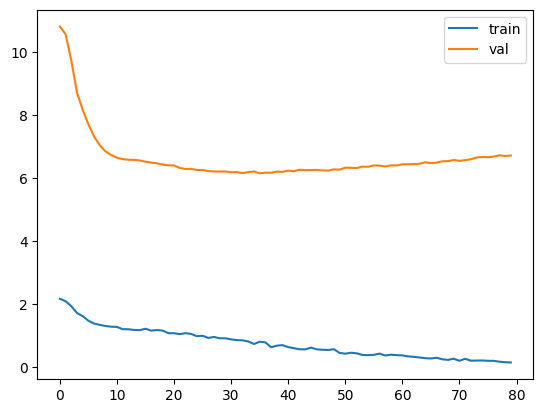

In [104]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label="train")
plt.plot(val_losses,label="val")
plt.legend()
plt.show()

In [105]:
torch.save(model.state_dict(),"model.pth")

In [110]:
model2=GPTModel(GPT_CONFIG_124M)
model2.load_state_dict(torch.load("model.pth"))
model2.to(device)

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(258, 768)
  (tblocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (w_query): Linear(in_features=768, out_features=768, bias=False)
        (w_key): Linear(in_features=768, out_features=768, bias=False)
        (w_value): Linear(in_features=768, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (w_query): Linear(in_features=768, out_features=768, bias=False)
        (w_key): Linear(in_features=768, out_features=768, bias=False)
        (w_

In [111]:
torch.save({
    "model_state_dict":model.state_dict(),
    "optimizer_state_dict":optimizer.state_dict(),

},"model_and_optimizer.pth")

In [114]:
model2=GPTModel(GPT_CONFIG_124M)
checkpoint=torch.load("model_and_optimizer.pth")
model2.load_state_dict(checkpoint["model_state_dict"])
optimizer=torch.optim.AdamW(model2.parameters(),lr=1e-4,weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])


In [128]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:].to(model.token_emb.weight.device) # Move input to model device
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1).to(idx.device)  # Move idx_next to the same device as idx

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True).to(idx.device)  # Move idx_next to the same device as idx


        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [129]:
torch.manual_seed(123)

token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you remember getting who had his own a vill all what with Mrs. Professional amusing


In [130]:
!pip install tensorflow>=2.15.0 tqdm>=4.66

In [132]:
import os
import requests  # Make sure requests is installed
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm

def download_and_load_gpt2(model_size, models_dir):
    # Validate model size
    allowed_sizes = ("124M", "355M", "774M", "1558M")
    if model_size not in allowed_sizes:
        raise ValueError(f"Model size not in {allowed_sizes}")

    # Define paths
    model_dir = os.path.join(models_dir, model_size)
    base_url = "https://openaipublic.blob.core.windows.net/gpt-2/models"
    filenames = [
        "checkpoint", "encoder.json", "hparams.json",
        "model.ckpt.data-00000-of-00001", "model.ckpt.index",
        "model.ckpt.meta", "vocab.bpe"
    ]

    # Download files
    os.makedirs(model_dir, exist_ok=True)
    for filename in filenames:
        file_url = os.path.join(base_url, model_size, filename)
        file_path = os.path.join(model_dir, filename)
        download_file(file_url, file_path)

    ## We have reached here until now ---> we have downloaded the files on our local machine.

    # Load settings and params
    tf_ckpt_path = tf.train.latest_checkpoint(model_dir)
    settings = json.load(open(os.path.join(model_dir, "hparams.json")))
    params = load_gpt2_params_from_tf_ckpt(tf_ckpt_path, settings)

    return settings, params

def download_file(url, destination):
    try:
        # Send a GET request to download the file, disabling SSL verification
        response = requests.get(url, stream=True, verify=False)

        # Get the total file size from headers, defaulting to 0 if not present
        file_size = int(response.headers.get("content-length", 0))

        # Check if file exists and has the same size
        if os.path.exists(destination):
            file_size_local = os.path.getsize(destination)
            if file_size == file_size_local:
                print(f"File already exists and is up-to-date: {destination}")
                return

        # Define the block size for reading the file
        block_size = 1024  # 1 Kilobyte

        # Initialize the progress bar with total file size
        progress_bar_description = url.split("/")[-1]  # Extract filename from URL
        with tqdm(total=file_size, unit="iB", unit_scale=True, desc=progress_bar_description) as progress_bar:
            # Open the destination file in binary write mode
            with open(destination, "wb") as file:
                # Iterate over the file data in chunks
                for chunk in response.iter_content(block_size):
                    progress_bar.update(len(chunk))  # Update progress bar
                    file.write(chunk)  # Write the chunk to the file

    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
        print(f"Please check the URL: {url}")

def load_gpt2_params_from_tf_ckpt(ckpt_path, settings):
    # Initialize parameters dictionary with empty blocks for each layer
    params = {"blocks": [{} for _ in range(settings["n_layer"])]}

    # Iterate over each variable in the checkpoint
    for name, _ in tf.train.list_variables(ckpt_path):
        # Load the variable and remove singleton dimensions
        variable_array = np.squeeze(tf.train.load_variable(ckpt_path, name))

        # Process the variable name to extract relevant parts
        variable_name_parts = name.split("/")[1:]  # Skip the 'model/' prefix

        # Identify the target dictionary for the variable
        target_dict = params
        if variable_name_parts[0].startswith("h"):
            layer_number = int(variable_name_parts[0][1:])
            target_dict = params["blocks"][layer_number]

        # Recursively access or create nested dictionaries
        for key in variable_name_parts[1:-1]:
            target_dict = target_dict.setdefault(key, {})

        # Assign the variable array to the last key
        last_key = variable_name_parts[-1]
        target_dict[last_key] = variable_array

    return params

ModuleNotFoundError: No module named 'gpt_download3'